In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import re
import nltk

In [2]:
pop_1 = pd.read_csv('popular.csv',names = ['user','followers','following','order','title','author','followinga','followersa','tags','article_link','ordera','date','figures','claps','words','sent','comments','complex','feat','refs'])

In [3]:
pop_2 = pd.read_csv('medium_pop_2.csv',names = ['user','followers','following','order','title','author','followinga','followersa','tags','article_link','ordera','date','figures','claps','words','sent','comments','complex','feat','refs'])

In [4]:
pop_1.shape

(1230, 20)

In [5]:
pop_2.shape

(1571, 20)

In [6]:
pop_1.head()

,user,followers,following,order,title,author,followinga,followersa,tags,article_link,ordera,date,figures,claps,words,sent,comments,complex,feat,refs
0,Shar Dahl,118,559,20,How to be a Man in 2018,Jason Berek-Lewis,730 Following,722 Followers,"['Feminism'],['Life'],['Men'],['Life Lessons']...",https://medium.com/s/story/my-year-as-an-angry...,19,Jul 11,1,133,174,0.153407,7,97.688000,0,[]
1,Yogesh Jaiswal,0,1,20,iOS — Start an app without a storyboard,Boris Ohayon,44 Following,501 Followers,"['iOS'],['Swift'],['Storyboard']",https://medium.com/s/futurehuman/how-different...,16,"Sep 29, 2016",10,1.2K,210,0.314222,19,101.045000,0,[]
2,Kim Vukovich,53,64,20,You’re Pronouncing the Names of These Popular ...,Haley Hamilton,Following,Followers,"['Language'],['Drinking'],['Alcohol'],['Bars']...",https://medium.com/s/futurehuman/how-different...,16,Jun 14,2,608,160,0.034214,20,105.084000,0,['https://scotchwhisky.com/events/16762/whisky...
3,Kim Vukovich,53,64,18,"Just as I Was About to Lose My Writing Drive, ...",Anne,Following,Followers,"['Writing'],['Creativity'],['Self'],['Self Imp...",https://medium.com/s/futurehuman/how-different...,16,Jun 26,3,579,456,0.267810,18,97.116667,0,['https://byrslf.co/i-finally-hit-the-writing-...
4,Steve,0,1,4,NaN,Heather Gift,7 Following,10 Followers,"['Leadership'],['Career'],['Management'],['Lea...",https://medium.com/s/futurehuman/how-different...,16,Mar 16,3,127,5,NaN,0,49.480000,0,['http://alabasterambition.com/affiliate-discl...


In [7]:
pop_1['tags'][0]

"['Feminism'],['Life'],['Men'],['Life Lessons'],['Love']"

In [8]:
pop = pop_1.append(pop_2,ignore_index = True)

In [9]:
pop['tags'][0]

"['Feminism'],['Life'],['Men'],['Life Lessons'],['Love']"

In [10]:
pop.shape

(2801, 20)

In [11]:
pop = pop.drop_duplicates()

In [12]:
pop.shape

(2801, 20)

In [13]:
pop['title'].value_counts().head(10)

The “Intent of Code” is Law                                                   10
EOS: Don’t Believe The Hype                                                    9
Introducing EOSIO Dawn 4.0                                                     9
Decentralized Blockchain Governance                                            9
29 Life-Changing Lessons That Will Make You Successful And More Strategic      9
Everything they don’t want you to know about EOS.                              8
If You Only Read A Few Books In 2018, Read These                               8
EOSIO Dawn 3.0 Now Available                                                   7
A quick beginner’s guide to drawing                                            7
What I’m Telling Business People About Why Relational Databases Are So Bad     7
Name: title, dtype: int64

In [14]:
pop['author'].value_counts().head()

Daniel Larimer       69
Benjamin P. Hardy    52
Kris Gage            47
Ryan Holiday         43
Tim Denning          34
Name: author, dtype: int64

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


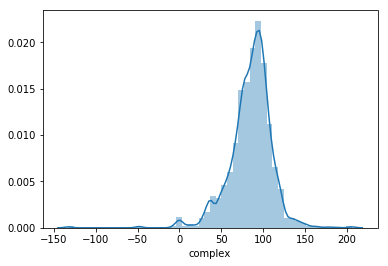

In [15]:
sb.distplot(pop['complex'].fillna(0))

In [16]:
def fix_date(date):
    if type(date)!=str:
        date = 0
    elif len(date)<10:
        date = date+", 2018"
    return date

In [17]:
def get_claps(r):
    claps = r
    if type(r)==str:
        if "K" in r:
            claps = float(r[0:-1])*1000
        elif "others" in r:
            r = r.replace(",","")
            claps = float(r[0:-7])
        else:
            claps = float(r)
    return claps

In [18]:
def fix_followers(r):
    fol = r
    if (type(r)==str):
        if (len(r)>5):
            r = r[0:-10]
        if "K" in r:
            r = r[0:-1]
            fol= float(r)*1000
        else:
            try:
                fol = float(r)
            except:
                fol = 0.0
    return fol

In [19]:
pop['Date']=pop['date'].apply(fix_date)

In [20]:
pop['Date']=pd.to_datetime(pop['Date'])

In [21]:
pop = pop.drop('date',axis = 1)

In [22]:
pop['claps_']=pop['claps'].apply(get_claps)

In [23]:
pop['claps_'].head()

0     133.0
1    1200.0
2     608.0
3     579.0
4     127.0
Name: claps_, dtype: float64

In [24]:
pop.dtypes

user                    object
followers                int64
following                int64
order                    int64
title                   object
author                  object
followinga              object
followersa              object
tags                    object
article_link            object
ordera                   int64
figures                  int64
claps                   object
words                    int64
sent                   float64
comments                 int64
complex                float64
feat                     int64
refs                    object
Date            datetime64[ns]
claps_                 float64
dtype: object

In [25]:
pop = pop.drop('claps',axis = 1)

In [26]:
pop['Followinga']=pop.followinga.apply(fix_followers)

In [27]:
pop['Followersa']=pop.followersa.apply(fix_followers)

In [28]:
pop.dtypes

user                    object
followers                int64
following                int64
order                    int64
title                   object
author                  object
followinga              object
followersa              object
tags                    object
article_link            object
ordera                   int64
figures                  int64
words                    int64
sent                   float64
comments                 int64
complex                float64
feat                     int64
refs                    object
Date            datetime64[ns]
claps_                 float64
Followinga             float64
Followersa             float64
dtype: object

In [29]:
pop = pop.drop(['followersa','followinga'],axis = 1)

In [30]:
pop.head()

,user,followers,following,order,title,author,tags,article_link,ordera,figures,words,sent,comments,complex,feat,refs,Date,claps_,Followinga,Followersa
0,Shar Dahl,118,559,20,How to be a Man in 2018,Jason Berek-Lewis,"['Feminism'],['Life'],['Men'],['Life Lessons']...",https://medium.com/s/story/my-year-as-an-angry...,19,1,174,0.153407,7,97.688000,0,[],2018-07-11,133.0,730.0,722.0
1,Yogesh Jaiswal,0,1,20,iOS — Start an app without a storyboard,Boris Ohayon,"['iOS'],['Swift'],['Storyboard']",https://medium.com/s/futurehuman/how-different...,16,10,210,0.314222,19,101.045000,0,[],2016-09-29,1200.0,44.0,501.0
2,Kim Vukovich,53,64,20,You’re Pronouncing the Names of These Popular ...,Haley Hamilton,"['Language'],['Drinking'],['Alcohol'],['Bars']...",https://medium.com/s/futurehuman/how-different...,16,2,160,0.034214,20,105.084000,0,['https://scotchwhisky.com/events/16762/whisky...,2018-06-14,608.0,0.0,0.0
3,Kim Vukovich,53,64,18,"Just as I Was About to Lose My Writing Drive, ...",Anne,"['Writing'],['Creativity'],['Self'],['Self Imp...",https://medium.com/s/futurehuman/how-different...,16,3,456,0.267810,18,97.116667,0,['https://byrslf.co/i-finally-hit-the-writing-...,2018-06-26,579.0,0.0,0.0
4,Steve,0,1,4,NaN,Heather Gift,"['Leadership'],['Career'],['Management'],['Lea...",https://medium.com/s/futurehuman/how-different...,16,3,5,NaN,0,49.480000,0,['http://alabasterambition.com/affiliate-discl...,2018-03-16,127.0,7.0,10.0


In [31]:
pop.columns

Index(['user', 'followers', 'following', 'order', 'title', 'author', 'tags',
       'article_link', 'ordera', 'figures', 'words', 'sent', 'comments',
       'complex', 'feat', 'refs', 'Date', 'claps_', 'Followinga',
       'Followersa'],
      dtype='object')

In [32]:
articles = pop[['title', 'author', 'tags',
       'article_link', 'ordera', 'figures', 'words', 'sent', 'comments',
       'complex', 'feat', 'refs', 'Date', 'claps_', 'Followinga',
       'Followersa']].drop_duplicates()

In [33]:
articles.shape

(2533, 16)

In [34]:
articles.head()

,title,author,tags,article_link,ordera,figures,words,sent,comments,complex,feat,refs,Date,claps_,Followinga,Followersa
0,How to be a Man in 2018,Jason Berek-Lewis,"['Feminism'],['Life'],['Men'],['Life Lessons']...",https://medium.com/s/story/my-year-as-an-angry...,19,1,174,0.153407,7,97.688000,0,[],2018-07-11,133.0,730.0,722.0
1,iOS — Start an app without a storyboard,Boris Ohayon,"['iOS'],['Swift'],['Storyboard']",https://medium.com/s/futurehuman/how-different...,16,10,210,0.314222,19,101.045000,0,[],2016-09-29,1200.0,44.0,501.0
2,You’re Pronouncing the Names of These Popular ...,Haley Hamilton,"['Language'],['Drinking'],['Alcohol'],['Bars']...",https://medium.com/s/futurehuman/how-different...,16,2,160,0.034214,20,105.084000,0,['https://scotchwhisky.com/events/16762/whisky...,2018-06-14,608.0,0.0,0.0
3,"Just as I Was About to Lose My Writing Drive, ...",Anne,"['Writing'],['Creativity'],['Self'],['Self Imp...",https://medium.com/s/futurehuman/how-different...,16,3,456,0.267810,18,97.116667,0,['https://byrslf.co/i-finally-hit-the-writing-...,2018-06-26,579.0,0.0,0.0
4,NaN,Heather Gift,"['Leadership'],['Career'],['Management'],['Lea...",https://medium.com/s/futurehuman/how-different...,16,3,5,NaN,0,49.480000,0,['http://alabasterambition.com/affiliate-discl...,2018-03-16,127.0,7.0,10.0


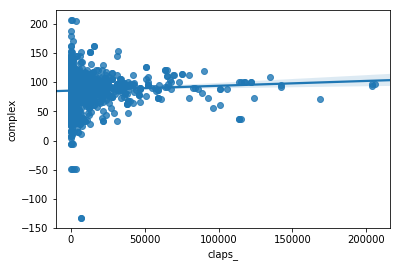

In [35]:
sb.regplot(data= articles, x = 'claps_',y = 'complex')

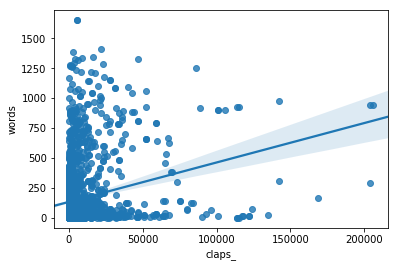

In [36]:
sb.regplot(data = articles, x = 'claps_',y = 'words')

In [37]:
def get_refs(r):
    count = len(r)
    return count

In [38]:
articles['ref_count']=(articles['refs'].apply(get_refs))

In [39]:
articles.head()

,title,author,tags,article_link,ordera,figures,words,sent,comments,complex,feat,refs,Date,claps_,Followinga,Followersa,ref_count
0,How to be a Man in 2018,Jason Berek-Lewis,"['Feminism'],['Life'],['Men'],['Life Lessons']...",https://medium.com/s/story/my-year-as-an-angry...,19,1,174,0.153407,7,97.688000,0,[],2018-07-11,133.0,730.0,722.0,2
1,iOS — Start an app without a storyboard,Boris Ohayon,"['iOS'],['Swift'],['Storyboard']",https://medium.com/s/futurehuman/how-different...,16,10,210,0.314222,19,101.045000,0,[],2016-09-29,1200.0,44.0,501.0,2
2,You’re Pronouncing the Names of These Popular ...,Haley Hamilton,"['Language'],['Drinking'],['Alcohol'],['Bars']...",https://medium.com/s/futurehuman/how-different...,16,2,160,0.034214,20,105.084000,0,['https://scotchwhisky.com/events/16762/whisky...,2018-06-14,608.0,0.0,0.0,627
3,"Just as I Was About to Lose My Writing Drive, ...",Anne,"['Writing'],['Creativity'],['Self'],['Self Imp...",https://medium.com/s/futurehuman/how-different...,16,3,456,0.267810,18,97.116667,0,['https://byrslf.co/i-finally-hit-the-writing-...,2018-06-26,579.0,0.0,0.0,115
4,NaN,Heather Gift,"['Leadership'],['Career'],['Management'],['Lea...",https://medium.com/s/futurehuman/how-different...,16,3,5,NaN,0,49.480000,0,['http://alabasterambition.com/affiliate-discl...,2018-03-16,127.0,7.0,10.0,323


In [40]:
(articles['refs'][2])

"['https://scotchwhisky.com/events/16762/whiskyfest-san-francisco/', 'https://en.wikipedia.org/wiki/Cynar', 'https://www.cocchi.it/en/wines/americano/', 'https://en.wikipedia.org/wiki/Cura%C3%A7ao_%28liqueur%29', 'https://en.wikipedia.org/wiki/Malbec', 'https://lagunitas.com/', 'https://en.wikipedia.org/wiki/Islay', 'https://en.wikipedia.org/wiki/Fernet', 'https://en.wikipedia.org/wiki/Mo%C3%ABt_%26_Chandon', 'https://distiller.com/spirits/pierre-ferrand-ambre-cognac', 'https://melmagazine.com/americans-need-to-calm-the-fuck-down-about-absinthe-c12266e5ac6b', 'https://melmagazine.com/on-the-rocks-a-history-c7af0dd09e75']"

In [41]:
articles['Tags']=articles['tags'].replace("]","")

In [42]:
articles['Tags']=articles['tags'].replace("[","")

In [43]:
articles['Tags'].tail()

2796    ['Web Development'],['JavaScript'],['Ruby on R...
2797    ['API'],['Tech'],['Software Development'],['We...
2798    ['JavaScript'],['Front End Development'],['Lea...
2799    ['Photography'],['Photojournalism'],['Immigrat...
2800    ['Golang'],['Software Development'],['Web Deve...
Name: Tags, dtype: object

In [44]:
(articles['Tags'][300])

"['Writing'],['Creativity'],['Social Media'],['Mental Health'],['Self Improvement']"

In [45]:
articles.head()

,title,author,tags,article_link,ordera,figures,words,sent,comments,complex,feat,refs,Date,claps_,Followinga,Followersa,ref_count,Tags
0,How to be a Man in 2018,Jason Berek-Lewis,"['Feminism'],['Life'],['Men'],['Life Lessons']...",https://medium.com/s/story/my-year-as-an-angry...,19,1,174,0.153407,7,97.688000,0,[],2018-07-11,133.0,730.0,722.0,2,"['Feminism'],['Life'],['Men'],['Life Lessons']..."
1,iOS — Start an app without a storyboard,Boris Ohayon,"['iOS'],['Swift'],['Storyboard']",https://medium.com/s/futurehuman/how-different...,16,10,210,0.314222,19,101.045000,0,[],2016-09-29,1200.0,44.0,501.0,2,"['iOS'],['Swift'],['Storyboard']"
2,You’re Pronouncing the Names of These Popular ...,Haley Hamilton,"['Language'],['Drinking'],['Alcohol'],['Bars']...",https://medium.com/s/futurehuman/how-different...,16,2,160,0.034214,20,105.084000,0,['https://scotchwhisky.com/events/16762/whisky...,2018-06-14,608.0,0.0,0.0,627,"['Language'],['Drinking'],['Alcohol'],['Bars']..."
3,"Just as I Was About to Lose My Writing Drive, ...",Anne,"['Writing'],['Creativity'],['Self'],['Self Imp...",https://medium.com/s/futurehuman/how-different...,16,3,456,0.267810,18,97.116667,0,['https://byrslf.co/i-finally-hit-the-writing-...,2018-06-26,579.0,0.0,0.0,115,"['Writing'],['Creativity'],['Self'],['Self Imp..."
4,NaN,Heather Gift,"['Leadership'],['Career'],['Management'],['Lea...",https://medium.com/s/futurehuman/how-different...,16,3,5,NaN,0,49.480000,0,['http://alabasterambition.com/affiliate-discl...,2018-03-16,127.0,7.0,10.0,323,"['Leadership'],['Career'],['Management'],['Lea..."


In [46]:
articles[articles['Tags'].str.contains("Intelligence")==True]

,title,author,tags,article_link,ordera,figures,words,sent,comments,complex,feat,refs,Date,claps_,Followinga,Followersa,ref_count,Tags
22,NaN,Berkman Klein Center,['Artificial Intelligence'],https://medium.com/s/story/the-vulgar-brillian...,1288,1,208,NaN,0,58.240000,0,"['http://cyber.harvard.edu/people/ybenkler', '...",2018-07-09,6.0,73.0,234.0,309,['Artificial Intelligence']
257,Machines Are Getting Better at Literary Analysis,The Economist,"['Writing'],['Machine Learning'],['Artificial ...",https://medium.com/s/story/the-vulgar-brillian...,1288,3,153,NaN,0,70.970000,0,['https://www.theatlantic.com/education/archiv...,2018-03-10,437.0,36.0,330000.0,421,"['Writing'],['Machine Learning'],['Artificial ..."
339,Here’s Why You Should Play Dumb When You Meet ...,Niklas Göke,"['Love'],['Dating'],['Relationships'],['Person...",https://medium.com/s/story/the-vulgar-brillian...,1288,5,84,NaN,0,103.120000,0,[],2017-06-19,1100.0,15.0,23000.0,2,"['Love'],['Dating'],['Relationships'],['Person..."
362,The Case for Personalized Travel Discovery,WayBlazer,"['Artificial Intelligence'],['Machine Learning...",https://medium.com/s/story/the-vulgar-brillian...,1288,8,201,0.000000,1,76.728000,0,['https://en.wikipedia.org/wiki/Sabre_Corporat...,2017-10-20,285.0,125.0,146.0,497,"['Artificial Intelligence'],['Machine Learning..."
519,Why Do We Murder the Beautiful Friendships of ...,Mark Greene,"['Masculinity'],['Gender Equality'],['Parentin...",https://medium.com/s/story/the-vulgar-brillian...,1288,9,1232,0.182912,24,93.200800,0,['https://goodmenproject.com/featured-content/...,2017-07-30,4990.0,1100.0,5800.0,643,"['Masculinity'],['Gender Equality'],['Parentin..."
531,Artificial Intelligence — The Revolution Hasn’...,Michael Jordan,"['Artificial Intelligence'],['Machine Learning...",https://medium.com/s/story/the-vulgar-brillian...,1288,1,125,0.143132,24,67.250000,0,[],2018-04-19,40000.0,1.0,5500.0,2,"['Artificial Intelligence'],['Machine Learning..."
998,When Your Job Is Done as a Data Scientist,Conor Dewey,"['Data Science'],['Artificial Intelligence'],[...",https://medium.com/s/story/the-vulgar-brillian...,1288,5,69,NaN,0,66.660000,0,['https://hbr.org/2012/10/data-scientist-the-s...,2018-06-07,386.0,0.0,0.0,398,"['Data Science'],['Artificial Intelligence'],[..."
999,Human Interpretable Machine Learning (Part 1) ...,Dipanjan (DJ) Sarkar,"['Machine Learning'],['Data Science'],['Artifi...",https://medium.com/s/story/the-vulgar-brillian...,1288,6,27,NaN,0,73.623333,0,"['https://www.datascience.com/', 'https://www....",2018-05-24,1000.0,0.0,0.0,791,"['Machine Learning'],['Data Science'],['Artifi..."
1087,Machine Learning is Fun! Part 2,Adam Geitgey,"['Artificial Intelligence'],['Machine Learning...",https://medium.com/s/story/the-vulgar-brillian...,1288,19,34,0.359933,26,77.697500,0,['https://medium.com/@ageitgey/machine-learnin...,2016-01-03,11300.0,36.0,35000.0,1110,"['Artificial Intelligence'],['Machine Learning..."
1088,2016: The Future of User Experience,Krish Ramineni,"['UX'],['Artificial Intelligence'],['Startup']",https://medium.com/s/story/the-vulgar-brillian...,1288,6,117,NaN,0,64.640000,0,['https://www.facebook.com/Krish-Ramineni-3957...,2016-01-01,45.0,139.0,171.0,87,"['UX'],['Artificial Intelligence'],['Startup']"


In [47]:
test = articles['Tags'][0]

In [48]:
test

"['Feminism'],['Life'],['Men'],['Life Lessons'],['Love']"

In [49]:
test=test.replace("[","")
test = test.replace("]","")
test = test.replace("'","")

In [50]:
test

'Feminism,Life,Men,Life Lessons,Love'

In [51]:
tes = test.replace(" ",",")

In [52]:
tes

'Feminism,Life,Men,Life,Lessons,Love'

In [53]:
def fix_tags(tag):
    try:
        tag = tag.replace("[","")
        tag = tag.replace("]","")
        tag = tag.replace("'","")
        tag = tag.replace(" ","_")
    except:
        tag = ''
    return tag

In [54]:
articles['Tags']= articles['tags'].apply(fix_tags)

In [55]:
articles = articles[articles['Tags'].isnull()==False]

In [56]:
documents = [nltk.word_tokenize(doc.lower()) for doc in articles['Tags']]


In [57]:
documents

[['feminism', ',', 'life', ',', 'men', ',', 'life_lessons', ',', 'love'],
 ['ios', ',', 'swift', ',', 'storyboard'],
 ['language', ',', 'drinking', ',', 'alcohol', ',', 'bars', ',', 'beer'],
 ['writing',
  ',',
  'creativity',
  ',',
  'self',
  ',',
  'self_improvement',
  ',',
  'life_lessons'],
 ['leadership',
  ',',
  'career',
  ',',
  'management',
  ',',
  'leadership_development',
  ',',
  'management_and_leadership'],
 ['startup',
  ',',
  'entrepreneurship',
  ',',
  'self_improvement',
  ',',
  'learning',
  ',',
  'life'],
 ['politics',
  ',',
  'language',
  ',',
  'china',
  ',',
  'trump',
  ',',
  'words_that_matter_2017'],
 ['startup', ',', 'b2b', ',', 'saas', ',', 'venture_capital', ',', 'business'],
 ['web_development',
  ',',
  'google_photos',
  ',',
  'photography',
  ',',
  'grid_layout',
  ',',
  'web_performance'],
 ['react', ',', 'redux', ',', 'javascript'],
 ['entrepreneurship',
  ',',
  'life_lessons',
  ',',
  'startup',
  ',',
  'self_improvement',
  ',',


In [58]:
len(documents)

2533

In [59]:
unigrams = [w for doc in documents for w in doc if len(w)==1]
bigrams = [w for doc in documents for w in doc if len(w)==2]

In [60]:
len(unigrams)

8398

In [61]:
unigrams[0:10]

[',', ',', ',', ',', ',', ',', ',', ',', ',', ',']

In [62]:
len(bigrams)

78

In [63]:
bigrams[0:10]

['ux', 'ux', 'ux', 'us', 'vc', 'ux', 'ui', 'ux', 'ai', 'ux']

In [64]:
"ai" in bigrams

True

In [65]:
stoplist = set(nltk.corpus.stopwords.words("english")+unigrams+bigrams)


In [66]:
documents = [[token for token in doc if token not in list(stoplist) + bigrams+unigrams] for doc in documents]


In [67]:
for doc in documents:
    doc.sort()

In [68]:
from gensim import corpora, models, similarities
dictionary = corpora.Dictionary(documents)

In [69]:
dictionary.compactify()
dictionary.save("medium.dict")

In [70]:
print(dictionary)

Dictionary(2111 unique tokens: ['feminism', 'life', 'life_lessons', 'love', 'men']...)


In [71]:
corpus = [dictionary.doc2bow(doc) for doc in documents]

In [72]:
import pyLDAvis

In [73]:
lda = models.LdaModel(corpus,id2word = dictionary, num_topics = 10,passes=10)

In [74]:
lda.show_topics()

[(0,
  '0.066*"self_improvement" + 0.059*"life_lessons" + 0.059*"life" + 0.041*"love" + 0.040*"relationships" + 0.038*"psychology" + 0.037*"creativity" + 0.026*"personal_development" + 0.026*"productivity" + 0.020*"mental_health"'),
 (1,
  '0.071*"javascript" + 0.065*"programming" + 0.055*"machine_learning" + 0.050*"web_development" + 0.048*"tech" + 0.047*"artificial_intelligence" + 0.035*"data_science" + 0.024*"towards_data_science" + 0.022*"react" + 0.022*"software_development"'),
 (2,
  '0.197*"blockchain" + 0.124*"cryptocurrency" + 0.088*"bitcoin" + 0.060*"eos" + 0.059*"ethereum" + 0.039*"crypto" + 0.017*"investing" + 0.013*"finance" + 0.012*"cryptocurrency_investment" + 0.011*"eosio"'),
 (3,
  '0.116*"entrepreneurship" + 0.107*"life" + 0.099*"startup" + 0.098*"life_lessons" + 0.079*"self_improvement" + 0.047*"productivity" + 0.043*"writing" + 0.033*"business" + 0.024*"inspiration" + 0.019*"creativity"'),
 (4,
  '0.033*"android" + 0.019*"founders" + 0.018*"physics" + 0.015*"ios" + 

In [75]:
import pyLDAvis.gensim

In [76]:
followers_data = pyLDAvis.gensim.prepare(lda,corpus,dictionary)
pyLDAvis.display(followers_data)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [77]:
lda = models.LdaModel(corpus,id2word = dictionary, num_topics = 8,passes=100)
followers_data = pyLDAvis.gensim.prepare(lda,corpus,dictionary)
pyLDAvis.display(followers_data)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [78]:
test_tag = ['data_science','machine_learning','python']
bow = dictionary.doc2bow(test_tag)

In [79]:
lda[bow]

[(0, 0.78125),
 (1, 0.03125),
 (2, 0.03125),
 (3, 0.03125),
 (4, 0.03125),
 (5, 0.03125),
 (6, 0.03125),
 (7, 0.03125)]

In [80]:
lda.show_topics()

[(0,
  '0.054*"tech" + 0.052*"programming" + 0.050*"javascript" + 0.039*"technology" + 0.038*"artificial_intelligence" + 0.038*"machine_learning" + 0.036*"web_development" + 0.025*"data_science" + 0.021*"politics" + 0.019*"startup"'),
 (1,
  '0.190*"blockchain" + 0.123*"cryptocurrency" + 0.091*"bitcoin" + 0.062*"ethereum" + 0.054*"eos" + 0.034*"crypto" + 0.019*"ico" + 0.017*"investing" + 0.016*"technology" + 0.014*"finance"'),
 (2,
  '0.032*"smart_contracts" + 0.021*"software_development" + 0.017*"design" + 0.013*"propaganda" + 0.013*"product_management" + 0.013*"software_engineering" + 0.013*"security" + 0.013*"immigration" + 0.012*"mental_health" + 0.012*"design_thinking"'),
 (3,
  '0.053*"politics" + 0.037*"economics" + 0.035*"humor" + 0.024*"leadership" + 0.022*"life" + 0.020*"news" + 0.020*"social_media" + 0.018*"money" + 0.014*"android" + 0.014*"culture"'),
 (4,
  '0.055*"blockchain" + 0.036*"decentralization" + 0.015*"technology" + 0.015*"history" + 0.015*"social_media" + 0.015*

In [81]:
lda.save('LDAmodel')

In [82]:
lda = models.LdaModel(corpus,id2word = dictionary, num_topics = 15,passes=100)
followers_data = pyLDAvis.gensim.prepare(lda,corpus,dictionary)
pyLDAvis.display(followers_data)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [83]:
lda.show_topics()

[(1,
  '0.057*"science" + 0.054*"technology" + 0.044*"education" + 0.042*"learning" + 0.034*"tech" + 0.028*"future" + 0.022*"space" + 0.016*"short_story" + 0.016*"health" + 0.015*"history"'),
 (4,
  '0.029*"photography" + 0.023*"mindfulness" + 0.021*"death" + 0.018*"gender" + 0.015*"sexual_assault" + 0.014*"metoo" + 0.013*"cryptography" + 0.013*"death_and_dying" + 0.012*"society" + 0.012*"vechain"'),
 (3,
  '0.052*"women" + 0.033*"feminism" + 0.027*"health" + 0.021*"venture_capital" + 0.019*"advertising" + 0.018*"men" + 0.015*"social_media" + 0.015*"founders" + 0.015*"fashion" + 0.015*"parenting"'),
 (7,
  '0.069*"design" + 0.065*"relationships" + 0.059*"love" + 0.035*"dating" + 0.021*"content_marketing" + 0.018*"music" + 0.017*"design_thinking" + 0.016*"tutorial" + 0.015*"product_design" + 0.015*"influencer_marketing"'),
 (10,
  '0.092*"artificial_intelligence" + 0.087*"machine_learning" + 0.059*"data_science" + 0.039*"towards_data_science" + 0.035*"deep_learning" + 0.024*"python" + 0

In [84]:
lda = models.LdaModel(corpus,id2word = dictionary, num_topics = 6,passes=100)
followers_data = pyLDAvis.gensim.prepare(lda,corpus,dictionary)
pyLDAvis.display(followers_data)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [85]:
lda.show_topics()

[(0,
  '0.021*"react" + 0.021*"javascript" + 0.020*"design" + 0.017*"software_development" + 0.014*"web_development" + 0.012*"eosnewyork" + 0.012*"music" + 0.011*"medium" + 0.011*"blockproducer" + 0.011*"programming"'),
 (1,
  '0.047*"programming" + 0.041*"technology" + 0.039*"tech" + 0.036*"artificial_intelligence" + 0.034*"machine_learning" + 0.033*"javascript" + 0.024*"web_development" + 0.023*"data_science" + 0.020*"social_media" + 0.020*"finance"'),
 (2,
  '0.052*"politics" + 0.047*"startup" + 0.032*"business" + 0.030*"design" + 0.024*"leadership" + 0.021*"marketing" + 0.018*"technology" + 0.017*"entrepreneurship" + 0.016*"creativity" + 0.015*"innovation"'),
 (3,
  '0.185*"blockchain" + 0.108*"cryptocurrency" + 0.079*"bitcoin" + 0.054*"ethereum" + 0.047*"eos" + 0.030*"crypto" + 0.019*"technology" + 0.016*"ico" + 0.014*"eosio" + 0.014*"investing"'),
 (4,
  '0.021*"science" + 0.018*"fintech" + 0.018*"racism" + 0.014*"politics" + 0.013*"health" + 0.012*"advice" + 0.012*"sex" + 0.010*

In [86]:
lda = models.LdaModel(corpus,id2word = dictionary, num_topics = 7,passes=100)
followers_data = pyLDAvis.gensim.prepare(lda,corpus,dictionary)
pyLDAvis.display(followers_data)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [87]:
lda.show_topics()

[(0,
  '0.048*"love" + 0.046*"relationships" + 0.032*"humor" + 0.025*"life" + 0.021*"politics" + 0.019*"women" + 0.017*"work" + 0.016*"leadership" + 0.016*"dating" + 0.015*"satire"'),
 (1,
  '0.058*"programming" + 0.051*"javascript" + 0.038*"artificial_intelligence" + 0.038*"machine_learning" + 0.036*"web_development" + 0.036*"tech" + 0.035*"technology" + 0.029*"software_development" + 0.025*"data_science" + 0.017*"react"'),
 (2,
  '0.070*"politics" + 0.020*"government" + 0.018*"economics" + 0.015*"propaganda" + 0.014*"money" + 0.012*"media" + 0.012*"environment" + 0.012*"racism" + 0.011*"photography" + 0.011*"medium"'),
 (3,
  '0.068*"design" + 0.025*"smart_contracts" + 0.023*"technology" + 0.014*"art" + 0.013*"future" + 0.013*"eosnewyork" + 0.012*"innovation" + 0.012*"tech" + 0.011*"creativity" + 0.010*"travel"'),
 (4,
  '0.093*"life" + 0.093*"life_lessons" + 0.089*"self_improvement" + 0.071*"entrepreneurship" + 0.067*"startup" + 0.045*"productivity" + 0.028*"creativity" + 0.022*"ins

In [88]:
lda = models.LdaModel(corpus,id2word = dictionary, num_topics = 9,passes=100)
followers_data = pyLDAvis.gensim.prepare(lda,corpus,dictionary)
pyLDAvis.display(followers_data)
lda.show_topics()

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


[(0,
  '0.057*"programming" + 0.045*"javascript" + 0.041*"tech" + 0.041*"technology" + 0.037*"artificial_intelligence" + 0.037*"machine_learning" + 0.035*"web_development" + 0.029*"software_development" + 0.025*"design" + 0.024*"data_science"'),
 (1,
  '0.075*"self_improvement" + 0.065*"creativity" + 0.055*"life_lessons" + 0.050*"life" + 0.049*"inspiration" + 0.048*"productivity" + 0.041*"personal_development" + 0.027*"writing" + 0.021*"mental_health" + 0.021*"design"'),
 (2,
  '0.066*"love" + 0.063*"relationships" + 0.042*"life" + 0.032*"politics" + 0.023*"women" + 0.022*"dating" + 0.022*"social_media" + 0.020*"life_lessons" + 0.019*"feminism" + 0.019*"sex"'),
 (3,
  '0.113*"blockchain" + 0.084*"eos" + 0.043*"eosio" + 0.021*"decentralization" + 0.021*"technology" + 0.016*"dapps" + 0.016*"eosnewyork" + 0.015*"blockproducer" + 0.013*"blockone" + 0.012*"distributed_ledgers"'),
 (4,
  '0.026*"education" + 0.017*"medium" + 0.016*"startup" + 0.016*"social_media" + 0.014*"product_management"

In [89]:
lda = models.LdaModel(corpus,id2word = dictionary, num_topics = 8,passes=1000)
followers_data = pyLDAvis.gensim.prepare(lda,corpus,dictionary)
pyLDAvis.display(followers_data)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [90]:
lda.show_topics()

[(0,
  '0.193*"blockchain" + 0.112*"cryptocurrency" + 0.083*"bitcoin" + 0.057*"ethereum" + 0.050*"eos" + 0.031*"crypto" + 0.017*"ico" + 0.016*"technology" + 0.015*"eosio" + 0.014*"investing"'),
 (1,
  '0.058*"culture" + 0.042*"books" + 0.030*"motivation" + 0.025*"psychology" + 0.016*"content_marketing" + 0.016*"api" + 0.015*"photography" + 0.014*"reading" + 0.014*"distributed_ledgers" + 0.011*"travel"'),
 (2,
  '0.060*"javascript" + 0.031*"web_development" + 0.024*"react" + 0.022*"technology" + 0.022*"programming" + 0.021*"learning" + 0.018*"science" + 0.017*"coding" + 0.017*"politics" + 0.015*"climate_change"'),
 (3,
  '0.100*"life" + 0.094*"life_lessons" + 0.086*"self_improvement" + 0.069*"entrepreneurship" + 0.060*"startup" + 0.044*"productivity" + 0.027*"creativity" + 0.027*"writing" + 0.024*"inspiration" + 0.020*"personal_development"'),
 (4,
  '0.053*"machine_learning" + 0.053*"artificial_intelligence" + 0.050*"politics" + 0.035*"data_science" + 0.023*"economics" + 0.017*"technol

In [91]:
lda.save('LDAmodel')

In [92]:
lda = models.LdaModel(corpus,id2word = dictionary, num_topics = 7,passes=1000)
followers_data = pyLDAvis.gensim.prepare(lda,corpus,dictionary)
pyLDAvis.display(followers_data)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [93]:
lda.show_topics()

[(0,
  '0.034*"health" + 0.024*"women" + 0.022*"science" + 0.020*"innovation" + 0.015*"tech" + 0.015*"sex" + 0.015*"feminism" + 0.012*"technology" + 0.012*"environment" + 0.012*"history"'),
 (1,
  '0.137*"cryptocurrency" + 0.125*"blockchain" + 0.110*"bitcoin" + 0.066*"ethereum" + 0.041*"crypto" + 0.023*"ico" + 0.021*"investing" + 0.017*"finance" + 0.014*"eos" + 0.013*"cryptocurrency_investment"'),
 (2,
  '0.167*"blockchain" + 0.066*"eos" + 0.039*"technology" + 0.024*"eosio" + 0.022*"decentralization" + 0.017*"smart_contracts" + 0.016*"cryptocurrency" + 0.014*"dating" + 0.012*"ethereum" + 0.010*"token"'),
 (3,
  '0.100*"life" + 0.091*"life_lessons" + 0.084*"self_improvement" + 0.063*"entrepreneurship" + 0.048*"startup" + 0.043*"productivity" + 0.027*"creativity" + 0.026*"writing" + 0.023*"inspiration" + 0.021*"psychology"'),
 (4,
  '0.027*"startup" + 0.019*"react" + 0.017*"marketing" + 0.015*"javascript" + 0.013*"racism" + 0.012*"leadership" + 0.012*"content_marketing" + 0.011*"photogra

In [94]:
lda = models.LdaModel(corpus,id2word = dictionary, num_topics = 10,passes=1000)
followers_data = pyLDAvis.gensim.prepare(lda,corpus,dictionary)
pyLDAvis.display(followers_data)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [95]:
lda.show_topics()

[(0,
  '0.109*"life" + 0.101*"self_improvement" + 0.097*"life_lessons" + 0.080*"entrepreneurship" + 0.063*"startup" + 0.047*"productivity" + 0.025*"inspiration" + 0.025*"psychology" + 0.024*"creativity" + 0.024*"personal_development"'),
 (1,
  '0.069*"machine_learning" + 0.063*"artificial_intelligence" + 0.045*"data_science" + 0.029*"towards_data_science" + 0.026*"deep_learning" + 0.018*"python" + 0.015*"security" + 0.015*"mental_health" + 0.015*"depression" + 0.013*"education"'),
 (2,
  '0.055*"decentralization" + 0.036*"technology" + 0.021*"movies" + 0.020*"eosio" + 0.019*"blockchain" + 0.019*"travel" + 0.018*"venture_capital" + 0.018*"blockone" + 0.018*"food" + 0.017*"film"'),
 (3,
  '0.058*"design" + 0.030*"science" + 0.023*"creativity" + 0.023*"art" + 0.020*"feminism" + 0.019*"eosnewyork" + 0.014*"short_story" + 0.012*"fiction" + 0.012*"product_design" + 0.012*"drawing"'),
 (4,
  '0.029*"innovation" + 0.025*"economics" + 0.024*"leadership" + 0.024*"news" + 0.023*"health" + 0.018*"

In [96]:
lda = models.LdaModel(corpus,id2word = dictionary, num_topics = 10,passes=10)
followers_data = pyLDAvis.gensim.prepare(lda,corpus,dictionary)
pyLDAvis.display(followers_data)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [97]:
lda.show_topics()

[(0,
  '0.113*"entrepreneurship" + 0.102*"startup" + 0.092*"life" + 0.085*"self_improvement" + 0.081*"life_lessons" + 0.063*"productivity" + 0.032*"business" + 0.022*"creativity" + 0.018*"writing" + 0.018*"marketing"'),
 (1,
  '0.064*"machine_learning" + 0.063*"artificial_intelligence" + 0.040*"data_science" + 0.029*"social_media" + 0.028*"towards_data_science" + 0.025*"deep_learning" + 0.022*"technology" + 0.020*"donald_trump" + 0.019*"humor" + 0.016*"python"'),
 (2,
  '0.165*"blockchain" + 0.093*"eos" + 0.032*"cryptocurrency" + 0.020*"eosio" + 0.018*"art" + 0.017*"design" + 0.014*"eosnewyork" + 0.014*"blockproducer" + 0.014*"crypto" + 0.013*"creativity"'),
 (3,
  '0.093*"blockchain" + 0.072*"technology" + 0.031*"design" + 0.024*"decentralization" + 0.022*"cryptocurrency" + 0.022*"eosio" + 0.016*"dapps" + 0.016*"eos" + 0.014*"social_media_marketing" + 0.013*"blockone"'),
 (4,
  '0.066*"politics" + 0.038*"creativity" + 0.034*"education" + 0.025*"writing" + 0.022*"learning" + 0.022*"ins

In [98]:
lda = models.LdaModel(corpus,id2word = dictionary, num_topics = 9,passes=100)
followers_data = pyLDAvis.gensim.prepare(lda,corpus,dictionary)
pyLDAvis.display(followers_data)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [99]:
lda.show_topics()

[(0,
  '0.063*"culture" + 0.024*"technology" + 0.023*"science" + 0.022*"health" + 0.021*"learning" + 0.020*"psychology" + 0.019*"reading" + 0.016*"development" + 0.016*"travel" + 0.015*"mental_health"'),
 (1,
  '0.084*"programming" + 0.073*"javascript" + 0.071*"tech" + 0.052*"web_development" + 0.046*"software_development" + 0.029*"technology" + 0.021*"react" + 0.017*"coding" + 0.014*"education" + 0.013*"cybersecurity"'),
 (2,
  '0.033*"relationships" + 0.033*"love" + 0.022*"dating" + 0.020*"propaganda" + 0.017*"women" + 0.016*"food" + 0.015*"music" + 0.012*"software" + 0.012*"health" + 0.010*"apple"'),
 (3,
  '0.044*"design" + 0.026*"environment" + 0.024*"sex" + 0.022*"climate_change" + 0.022*"feminism" + 0.020*"women" + 0.019*"history" + 0.017*"movies" + 0.013*"film" + 0.013*"front_end_development"'),
 (4,
  '0.102*"life" + 0.095*"life_lessons" + 0.090*"self_improvement" + 0.066*"entrepreneurship" + 0.052*"startup" + 0.045*"productivity" + 0.032*"creativity" + 0.028*"writing" + 0.024

In [100]:
lda = models.LdaModel(corpus,id2word = dictionary, num_topics = 8,passes=100)
followers_data = pyLDAvis.gensim.prepare(lda,corpus,dictionary)
pyLDAvis.display(followers_data)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [101]:
lda.show_topics()

[(0,
  '0.149*"blockchain" + 0.112*"cryptocurrency" + 0.082*"bitcoin" + 0.056*"ethereum" + 0.031*"crypto" + 0.028*"javascript" + 0.026*"programming" + 0.021*"technology" + 0.021*"eos" + 0.021*"web_development"'),
 (1,
  '0.050*"artificial_intelligence" + 0.049*"machine_learning" + 0.032*"data_science" + 0.029*"blockchain" + 0.021*"towards_data_science" + 0.020*"innovation" + 0.019*"deep_learning" + 0.019*"technology" + 0.015*"environment" + 0.014*"climate_change"'),
 (2,
  '0.106*"life" + 0.096*"life_lessons" + 0.089*"self_improvement" + 0.071*"entrepreneurship" + 0.052*"startup" + 0.045*"productivity" + 0.032*"creativity" + 0.027*"writing" + 0.024*"inspiration" + 0.022*"psychology"'),
 (3,
  '0.097*"politics" + 0.020*"government" + 0.019*"donald_trump" + 0.016*"sex" + 0.015*"news" + 0.015*"propaganda" + 0.015*"economics" + 0.014*"android" + 0.013*"war" + 0.013*"movies"'),
 (4,
  '0.051*"technology" + 0.042*"design" + 0.038*"startup" + 0.030*"business" + 0.026*"tech" + 0.026*"marketing

In [102]:
lda = models.LdaModel(corpus,id2word = dictionary, num_topics = 9,passes=100)
followers_data = pyLDAvis.gensim.prepare(lda,corpus,dictionary)
pyLDAvis.display(followers_data)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [103]:
lda.show_topics()

[(0,
  '0.101*"politics" + 0.024*"leadership" + 0.023*"satire" + 0.022*"donald_trump" + 0.021*"humor" + 0.019*"economics" + 0.018*"news" + 0.018*"feminism" + 0.017*"women" + 0.011*"product_management"'),
 (1,
  '0.081*"programming" + 0.071*"javascript" + 0.059*"tech" + 0.050*"web_development" + 0.045*"software_development" + 0.025*"technology" + 0.023*"react" + 0.017*"coding" + 0.016*"startup" + 0.013*"design"'),
 (2,
  '0.034*"education" + 0.018*"blockchain" + 0.017*"content_marketing" + 0.015*"influencer_marketing" + 0.014*"music" + 0.013*"branding" + 0.012*"family" + 0.011*"founders" + 0.011*"aws" + 0.011*"advertising"'),
 (3,
  '0.056*"artificial_intelligence" + 0.055*"machine_learning" + 0.036*"technology" + 0.036*"data_science" + 0.024*"towards_data_science" + 0.021*"deep_learning" + 0.021*"innovation" + 0.018*"environment" + 0.016*"climate_change" + 0.015*"python"'),
 (4,
  '0.187*"blockchain" + 0.112*"eos" + 0.033*"eosio" + 0.030*"decentralization" + 0.024*"technology" + 0.017*

In [104]:
lda.save('LDAmodel')

In [105]:
lda = models.LdaModel(corpus,id2word = dictionary, num_topics = 9,passes=2)
followers_data = pyLDAvis.gensim.prepare(lda,corpus,dictionary)
pyLDAvis.display(followers_data)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [106]:
lda.show_topics()

[(0,
  '0.040*"blockchain" + 0.036*"eosio" + 0.030*"creativity" + 0.024*"life_lessons" + 0.023*"mental_health" + 0.020*"productivity" + 0.020*"self_improvement" + 0.020*"life" + 0.019*"writing" + 0.017*"eos"'),
 (1,
  '0.025*"science" + 0.020*"startup" + 0.020*"social_media_marketing" + 0.017*"health" + 0.017*"entrepreneurship" + 0.016*"technology" + 0.013*"physics" + 0.012*"design" + 0.011*"branding" + 0.011*"world_cup"'),
 (2,
  '0.096*"bitcoin" + 0.074*"blockchain" + 0.047*"cryptocurrency" + 0.017*"smart_contracts" + 0.017*"ethereum" + 0.016*"money" + 0.015*"women" + 0.013*"life" + 0.012*"investing" + 0.011*"tutorial"'),
 (3,
  '0.057*"blockchain" + 0.023*"artificial_intelligence" + 0.020*"data_science" + 0.019*"machine_learning" + 0.019*"towards_data_science" + 0.018*"cryptocurrency" + 0.018*"design" + 0.015*"fintech" + 0.014*"eos" + 0.013*"programming"'),
 (4,
  '0.066*"javascript" + 0.051*"programming" + 0.041*"web_development" + 0.034*"software_development" + 0.028*"tech" + 0.02

In [107]:
lda = models.LdaModel(corpus,id2word = dictionary, num_topics = 8,passes=2)
followers_data = pyLDAvis.gensim.prepare(lda,corpus,dictionary)
pyLDAvis.display(followers_data)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [108]:
lda.show_topics()

[(0,
  '0.041*"politics" + 0.026*"design" + 0.024*"tech" + 0.019*"relationships" + 0.017*"love" + 0.013*"dating" + 0.012*"software_development" + 0.012*"react" + 0.011*"programming" + 0.011*"javascript"'),
 (1,
  '0.053*"artificial_intelligence" + 0.051*"machine_learning" + 0.025*"deep_learning" + 0.022*"technology" + 0.021*"travel" + 0.021*"towards_data_science" + 0.021*"data_science" + 0.017*"life_lessons" + 0.015*"self_improvement" + 0.011*"money"'),
 (2,
  '0.154*"blockchain" + 0.065*"eos" + 0.044*"technology" + 0.036*"cryptocurrency" + 0.024*"eosio" + 0.017*"smart_contracts" + 0.015*"bitcoin" + 0.014*"ethereum" + 0.014*"decentralization" + 0.011*"javascript"'),
 (3,
  '0.139*"blockchain" + 0.112*"cryptocurrency" + 0.065*"bitcoin" + 0.058*"ethereum" + 0.034*"crypto" + 0.028*"ico" + 0.014*"eos" + 0.012*"sharing_economy" + 0.012*"investing" + 0.011*"innovation"'),
 (4,
  '0.026*"social_media" + 0.019*"content_marketing" + 0.015*"music" + 0.013*"advertising" + 0.013*"marketing" + 0.01

In [109]:
lda = models.LdaModel(corpus,id2word = dictionary, num_topics = 10,passes=2)
followers_data = pyLDAvis.gensim.prepare(lda,corpus,dictionary)
pyLDAvis.display(followers_data)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [110]:
lda.show_topics()

[(0,
  '0.044*"health" + 0.040*"science" + 0.016*"ui_design" + 0.015*"life" + 0.012*"neuroscience" + 0.012*"mental_health" + 0.012*"space" + 0.011*"technology" + 0.011*"product_management" + 0.010*"physics"'),
 (1,
  '0.059*"entrepreneurship" + 0.058*"blockchain" + 0.046*"life" + 0.039*"technology" + 0.032*"startup" + 0.032*"life_lessons" + 0.029*"self_improvement" + 0.025*"business" + 0.023*"productivity" + 0.022*"creativity"'),
 (2,
  '0.065*"love" + 0.061*"relationships" + 0.048*"life_lessons" + 0.040*"life" + 0.025*"self_improvement" + 0.023*"self-awareness" + 0.018*"dating" + 0.018*"politics" + 0.016*"personal_development" + 0.016*"travel"'),
 (3,
  '0.159*"blockchain" + 0.129*"cryptocurrency" + 0.096*"bitcoin" + 0.063*"ethereum" + 0.032*"crypto" + 0.028*"eos" + 0.022*"ico" + 0.019*"investing" + 0.015*"technology" + 0.014*"finance"'),
 (4,
  '0.078*"blockchain" + 0.019*"humor" + 0.019*"decentralization" + 0.018*"eos" + 0.016*"music" + 0.016*"ethereum" + 0.015*"politics" + 0.013*"a

In [111]:
lda = models.LdaModel(corpus,id2word = dictionary, num_topics = 8,passes=5)
followers_data = pyLDAvis.gensim.prepare(lda,corpus,dictionary)
pyLDAvis.display(followers_data)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [112]:
lda.show_topics()

[(0,
  '0.077*"programming" + 0.046*"technology" + 0.045*"web_development" + 0.042*"javascript" + 0.039*"software_development" + 0.023*"tech" + 0.021*"blockchain" + 0.018*"eosio" + 0.015*"coding" + 0.014*"cybersecurity"'),
 (1,
  '0.033*"science" + 0.032*"javascript" + 0.023*"react" + 0.013*"medium" + 0.011*"nodejs" + 0.011*"space" + 0.010*"engineering" + 0.010*"physics" + 0.010*"aws" + 0.010*"technology"'),
 (2,
  '0.052*"design" + 0.027*"health" + 0.024*"politics" + 0.022*"creativity" + 0.020*"art" + 0.016*"leadership" + 0.015*"content_marketing" + 0.015*"social_media_marketing" + 0.014*"influencer_marketing" + 0.013*"economics"'),
 (3,
  '0.045*"blockchain" + 0.023*"women" + 0.020*"machine_learning" + 0.018*"tech" + 0.016*"artificial_intelligence" + 0.016*"token" + 0.015*"feminism" + 0.014*"python" + 0.013*"development" + 0.013*"education"'),
 (4,
  '0.048*"life" + 0.045*"love" + 0.044*"life_lessons" + 0.044*"relationships" + 0.025*"humor" + 0.020*"self_improvement" + 0.017*"philoso

In [113]:
lda = models.LdaModel(corpus,id2word = dictionary, num_topics = 9,passes=1)
followers_data = pyLDAvis.gensim.prepare(lda,corpus,dictionary)
pyLDAvis.display(followers_data)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [114]:
lda.show_topics()

[(0,
  '0.038*"life_lessons" + 0.037*"life" + 0.021*"politics" + 0.018*"social_media_marketing" + 0.017*"inspiration" + 0.016*"self_improvement" + 0.016*"creativity" + 0.016*"productivity" + 0.012*"design" + 0.011*"leadership"'),
 (1,
  '0.088*"bitcoin" + 0.067*"blockchain" + 0.056*"cryptocurrency" + 0.018*"investing" + 0.016*"finance" + 0.012*"fintech" + 0.012*"crypto" + 0.008*"smart_contracts" + 0.008*"cryptocurrency_investment" + 0.008*"startup"'),
 (2,
  '0.035*"relationships" + 0.035*"love" + 0.028*"blockchain" + 0.022*"javascript" + 0.016*"bitshares" + 0.015*"politics" + 0.014*"artificial_intelligence" + 0.013*"dating" + 0.013*"life_lessons" + 0.013*"distributed_ledgers"'),
 (3,
  '0.086*"self_improvement" + 0.079*"life_lessons" + 0.078*"life" + 0.042*"entrepreneurship" + 0.031*"productivity" + 0.028*"design" + 0.021*"personal_development" + 0.020*"startup" + 0.016*"culture" + 0.011*"success"'),
 (4,
  '0.058*"blockchain" + 0.031*"artificial_intelligence" + 0.026*"cryptocurrency"

In [115]:
lda = models.LdaModel(corpus,id2word = dictionary, num_topics = 7,passes=1)
followers_data = pyLDAvis.gensim.prepare(lda,corpus,dictionary)
pyLDAvis.display(followers_data)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [116]:
lda.show_topics()

[(0,
  '0.099*"blockchain" + 0.061*"eos" + 0.030*"bitcoin" + 0.029*"cryptocurrency" + 0.025*"politics" + 0.021*"ethereum" + 0.014*"smart_contracts" + 0.013*"technology" + 0.011*"eosio" + 0.010*"humor"'),
 (1,
  '0.051*"startup" + 0.028*"life" + 0.025*"entrepreneurship" + 0.025*"javascript" + 0.024*"web_development" + 0.023*"technology" + 0.021*"programming" + 0.018*"leadership" + 0.018*"social_media" + 0.017*"business"'),
 (2,
  '0.046*"startup" + 0.029*"tech" + 0.027*"entrepreneurship" + 0.020*"life_lessons" + 0.019*"blockchain" + 0.018*"writing" + 0.017*"javascript" + 0.016*"programming" + 0.016*"self_improvement" + 0.015*"web_development"'),
 (3,
  '0.093*"blockchain" + 0.039*"cryptocurrency" + 0.035*"ico" + 0.030*"ethereum" + 0.021*"bitcoin" + 0.017*"technology" + 0.012*"programming" + 0.012*"life_lessons" + 0.011*"decentralization" + 0.010*"content_marketing"'),
 (4,
  '0.064*"self_improvement" + 0.057*"life_lessons" + 0.056*"life" + 0.042*"entrepreneurship" + 0.034*"productivity"

In [117]:
lda = models.LdaModel(corpus,id2word = dictionary, num_topics = 8,passes=1)
followers_data = pyLDAvis.gensim.prepare(lda,corpus,dictionary)
pyLDAvis.display(followers_data)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [118]:
lda.show_topics()

[(0,
  '0.087*"blockchain" + 0.073*"technology" + 0.024*"ethereum" + 0.021*"cryptocurrency" + 0.016*"eosio" + 0.015*"business" + 0.014*"tech" + 0.012*"eos" + 0.012*"smart_contracts" + 0.011*"future"'),
 (1,
  '0.039*"artificial_intelligence" + 0.032*"machine_learning" + 0.032*"politics" + 0.020*"deep_learning" + 0.018*"tech" + 0.017*"data_science" + 0.015*"towards_data_science" + 0.014*"design" + 0.013*"women" + 0.011*"propaganda"'),
 (2,
  '0.096*"blockchain" + 0.060*"cryptocurrency" + 0.049*"bitcoin" + 0.038*"ethereum" + 0.025*"startup" + 0.019*"ico" + 0.017*"investing" + 0.016*"eos" + 0.012*"programming" + 0.012*"trading"'),
 (3,
  '0.092*"blockchain" + 0.047*"eos" + 0.029*"cryptocurrency" + 0.018*"innovation" + 0.016*"startup" + 0.013*"entrepreneurship" + 0.013*"javascript" + 0.011*"content_marketing" + 0.011*"marketing" + 0.010*"ethereum"'),
 (4,
  '0.022*"life" + 0.021*"politics" + 0.019*"leadership" + 0.016*"javascript" + 0.012*"self_improvement" + 0.011*"technology" + 0.010*"en

In [119]:
lda = models.LdaModel(corpus,id2word = dictionary, num_topics = 9)
followers_data = pyLDAvis.gensim.prepare(lda,corpus,dictionary)
pyLDAvis.display(followers_data)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [120]:
lda.show_topics()

[(0,
  '0.063*"blockchain" + 0.043*"programming" + 0.036*"cryptocurrency" + 0.035*"javascript" + 0.034*"ethereum" + 0.029*"web_development" + 0.019*"ico" + 0.016*"software_development" + 0.014*"bitcoin" + 0.012*"react"'),
 (1,
  '0.054*"life" + 0.051*"life_lessons" + 0.028*"self_improvement" + 0.023*"machine_learning" + 0.023*"relationships" + 0.022*"artificial_intelligence" + 0.021*"deep_learning" + 0.021*"love" + 0.018*"productivity" + 0.018*"entrepreneurship"'),
 (2,
  '0.159*"blockchain" + 0.079*"eos" + 0.040*"cryptocurrency" + 0.033*"technology" + 0.026*"eosio" + 0.015*"decentralization" + 0.014*"crypto" + 0.012*"startup" + 0.011*"creativity" + 0.010*"eosnewyork"'),
 (3,
  '0.072*"entrepreneurship" + 0.064*"self_improvement" + 0.061*"life" + 0.059*"startup" + 0.055*"life_lessons" + 0.033*"productivity" + 0.030*"creativity" + 0.023*"inspiration" + 0.015*"innovation" + 0.015*"environment"'),
 (4,
  '0.025*"software_development" + 0.020*"javascript" + 0.012*"tech" + 0.012*"government

In [121]:
lda = models.LdaModel(corpus,id2word = dictionary, num_topics = 8)
followers_data = pyLDAvis.gensim.prepare(lda,corpus,dictionary)
pyLDAvis.display(followers_data)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [122]:
lda.show_topics()

[(0,
  '0.049*"life" + 0.044*"self_improvement" + 0.043*"inspiration" + 0.037*"life_lessons" + 0.031*"productivity" + 0.028*"creativity" + 0.020*"personal_development" + 0.019*"startup" + 0.019*"entrepreneurship" + 0.014*"personal_growth"'),
 (1,
  '0.074*"life" + 0.059*"life_lessons" + 0.052*"entrepreneurship" + 0.046*"self_improvement" + 0.041*"startup" + 0.024*"technology" + 0.023*"productivity" + 0.020*"psychology" + 0.014*"programming" + 0.014*"politics"'),
 (2,
  '0.110*"blockchain" + 0.086*"cryptocurrency" + 0.038*"crypto" + 0.035*"bitcoin" + 0.032*"ethereum" + 0.021*"ico" + 0.015*"technology" + 0.012*"sharing_economy" + 0.012*"eos" + 0.012*"economics"'),
 (3,
  '0.138*"blockchain" + 0.064*"eos" + 0.040*"cryptocurrency" + 0.024*"eosio" + 0.020*"technology" + 0.015*"crypto" + 0.012*"decentralization" + 0.011*"investing" + 0.011*"bitcoin" + 0.010*"content_marketing"'),
 (4,
  '0.059*"artificial_intelligence" + 0.033*"machine_learning" + 0.025*"technology" + 0.021*"deep_learning" +

In [123]:
lda = models.LdaModel(corpus,id2word = dictionary, num_topics = 8,alpha = 0.3)
followers_data = pyLDAvis.gensim.prepare(lda,corpus,dictionary)
pyLDAvis.display(followers_data)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [124]:
lda.show_topics()

[(0,
  '0.048*"technology" + 0.019*"creativity" + 0.019*"artificial_intelligence" + 0.018*"humor" + 0.015*"life" + 0.013*"medium" + 0.011*"leadership" + 0.011*"economics" + 0.011*"politics" + 0.010*"feminism"'),
 (1,
  '0.032*"politics" + 0.020*"mental_health" + 0.016*"education" + 0.015*"health" + 0.014*"government" + 0.012*"self_improvement" + 0.012*"innovation" + 0.011*"life_lessons" + 0.010*"eeg" + 0.009*"propaganda"'),
 (2,
  '0.121*"blockchain" + 0.086*"bitcoin" + 0.072*"cryptocurrency" + 0.053*"ethereum" + 0.026*"eos" + 0.026*"startup" + 0.018*"artificial_intelligence" + 0.017*"technology" + 0.016*"life" + 0.014*"crypto"'),
 (3,
  '0.035*"programming" + 0.034*"life" + 0.032*"productivity" + 0.026*"web_development" + 0.026*"javascript" + 0.025*"self_improvement" + 0.023*"tech" + 0.022*"creativity" + 0.018*"startup" + 0.017*"software_development"'),
 (4,
  '0.080*"life_lessons" + 0.070*"self_improvement" + 0.068*"life" + 0.048*"startup" + 0.045*"entrepreneurship" + 0.031*"producti

In [125]:
lda = models.LdaModel(corpus,id2word = dictionary, num_topics = 8,alpha = 0.01)
followers_data = pyLDAvis.gensim.prepare(lda,corpus,dictionary)
pyLDAvis.display(followers_data)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [126]:
lda.show_topics()

[(0,
  '0.039*"programming" + 0.034*"javascript" + 0.032*"blockchain" + 0.028*"web_development" + 0.026*"tech" + 0.025*"software_development" + 0.025*"cryptocurrency" + 0.025*"artificial_intelligence" + 0.024*"technology" + 0.015*"bitcoin"'),
 (1,
  '0.085*"life" + 0.062*"life_lessons" + 0.060*"entrepreneurship" + 0.054*"self_improvement" + 0.046*"startup" + 0.035*"productivity" + 0.029*"inspiration" + 0.023*"creativity" + 0.017*"writing" + 0.014*"love"'),
 (2,
  '0.017*"technology" + 0.016*"data_science" + 0.016*"social_media_marketing" + 0.015*"cryptocurrency" + 0.015*"machine_learning" + 0.012*"towards_data_science" + 0.010*"bitcoin" + 0.010*"sustainability" + 0.010*"bitshares" + 0.009*"employee_owned"'),
 (3,
  '0.115*"blockchain" + 0.064*"eos" + 0.029*"eosio" + 0.027*"technology" + 0.026*"cryptocurrency" + 0.014*"ico" + 0.012*"decentralization" + 0.012*"science" + 0.011*"eosnewyork" + 0.011*"dapps"'),
 (4,
  '0.034*"design" + 0.030*"technology" + 0.025*"creativity" + 0.019*"blockc

In [127]:
lda = models.LdaModel(corpus,id2word = dictionary, num_topics = 8)
followers_data = pyLDAvis.gensim.prepare(lda,corpus,dictionary)
pyLDAvis.display(followers_data)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [128]:
lda.show_topics()

[(0,
  '0.059*"life" + 0.058*"entrepreneurship" + 0.056*"life_lessons" + 0.048*"self_improvement" + 0.033*"startup" + 0.025*"writing" + 0.023*"relationships" + 0.019*"love" + 0.018*"inspiration" + 0.017*"productivity"'),
 (1,
  '0.029*"creativity" + 0.025*"technology" + 0.022*"life" + 0.020*"design" + 0.019*"life_lessons" + 0.018*"tech" + 0.017*"self_improvement" + 0.015*"inspiration" + 0.015*"startup" + 0.015*"programming"'),
 (2,
  '0.150*"blockchain" + 0.102*"cryptocurrency" + 0.061*"bitcoin" + 0.049*"ethereum" + 0.037*"eos" + 0.030*"crypto" + 0.018*"technology" + 0.017*"ico" + 0.014*"decentralization" + 0.014*"investing"'),
 (3,
  '0.029*"technology" + 0.018*"life_lessons" + 0.018*"government" + 0.017*"politics" + 0.016*"propaganda" + 0.014*"artificial_intelligence" + 0.013*"future" + 0.011*"blockchain" + 0.010*"entrepreneurship" + 0.009*"war"'),
 (4,
  '0.059*"bitcoin" + 0.034*"cryptocurrency" + 0.033*"programming" + 0.028*"blockchain" + 0.026*"software_development" + 0.024*"javas

In [129]:
lda = models.LdaModel(corpus,id2word = dictionary, num_topics = 8,alpha = 0.6)
followers_data = pyLDAvis.gensim.prepare(lda,corpus,dictionary)
pyLDAvis.display(followers_data)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [130]:
lda.show_topics()

[(0,
  '0.062*"blockchain" + 0.049*"bitcoin" + 0.031*"cryptocurrency" + 0.023*"technology" + 0.021*"ethereum" + 0.020*"life" + 0.016*"self_improvement" + 0.015*"life_lessons" + 0.014*"crypto" + 0.011*"design"'),
 (1,
  '0.042*"cryptocurrency" + 0.037*"blockchain" + 0.022*"life_lessons" + 0.021*"bitcoin" + 0.017*"ethereum" + 0.016*"self_improvement" + 0.015*"life" + 0.013*"startup" + 0.013*"entrepreneurship" + 0.011*"crypto"'),
 (2,
  '0.109*"blockchain" + 0.051*"cryptocurrency" + 0.035*"eos" + 0.032*"bitcoin" + 0.022*"ethereum" + 0.016*"crypto" + 0.016*"life" + 0.015*"technology" + 0.014*"eosio" + 0.011*"startup"'),
 (3,
  '0.039*"blockchain" + 0.021*"tech" + 0.020*"technology" + 0.020*"cryptocurrency" + 0.014*"bitcoin" + 0.014*"life" + 0.014*"programming" + 0.013*"life_lessons" + 0.013*"startup" + 0.010*"design"'),
 (4,
  '0.031*"cryptocurrency" + 0.030*"blockchain" + 0.016*"life" + 0.015*"javascript" + 0.015*"bitcoin" + 0.014*"technology" + 0.013*"life_lessons" + 0.012*"programming" 

In [131]:
lda = models.LdaModel(corpus,id2word = dictionary, num_topics = 8,alpha = 0.001,passes = 10)
followers_data = pyLDAvis.gensim.prepare(lda,corpus,dictionary)
pyLDAvis.display(followers_data)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [132]:
lda.show_topics()

[(0,
  '0.085*"blockchain" + 0.058*"eos" + 0.042*"artificial_intelligence" + 0.038*"machine_learning" + 0.031*"technology" + 0.026*"eosio" + 0.023*"data_science" + 0.020*"politics" + 0.018*"towards_data_science" + 0.016*"deep_learning"'),
 (1,
  '0.098*"life" + 0.092*"self_improvement" + 0.090*"life_lessons" + 0.075*"entrepreneurship" + 0.057*"startup" + 0.046*"productivity" + 0.028*"creativity" + 0.024*"inspiration" + 0.022*"psychology" + 0.021*"business"'),
 (2,
  '0.061*"love" + 0.058*"relationships" + 0.025*"design" + 0.022*"life" + 0.020*"dating" + 0.020*"life_lessons" + 0.016*"mental_health" + 0.015*"happiness" + 0.014*"api" + 0.011*"self-awareness"'),
 (3,
  '0.046*"politics" + 0.025*"environment" + 0.020*"innovation" + 0.019*"climate_change" + 0.016*"technology" + 0.016*"satire" + 0.012*"science" + 0.012*"donald_trump" + 0.010*"space" + 0.010*"women"'),
 (4,
  '0.017*"social_media_marketing" + 0.016*"influencer_marketing" + 0.016*"art" + 0.016*"creativity" + 0.014*"real_estate"

In [134]:
lda = models.LdaModel(corpus,id2word = dictionary, num_topics = 8,passes = 10,eta = 0.01)
followers_data = pyLDAvis.gensim.prepare(lda,corpus,dictionary)
pyLDAvis.display(followers_data)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [135]:
lda.show_topics()

[(0,
  '0.067*"life" + 0.063*"inspiration" + 0.060*"self_improvement" + 0.055*"productivity" + 0.055*"creativity" + 0.053*"life_lessons" + 0.046*"culture" + 0.043*"writing" + 0.041*"education" + 0.036*"psychology"'),
 (1,
  '0.077*"politics" + 0.060*"design" + 0.027*"women" + 0.022*"humor" + 0.022*"writing" + 0.020*"government" + 0.019*"creativity" + 0.019*"donald_trump" + 0.018*"art" + 0.017*"satire"'),
 (2,
  '0.222*"blockchain" + 0.102*"eos" + 0.093*"cryptocurrency" + 0.066*"bitcoin" + 0.057*"ethereum" + 0.033*"investing" + 0.026*"technology" + 0.019*"eosio" + 0.016*"science" + 0.015*"economics"'),
 (3,
  '0.114*"javascript" + 0.081*"web_development" + 0.063*"programming" + 0.050*"social_media" + 0.036*"react" + 0.030*"environment" + 0.026*"climate_change" + 0.020*"music" + 0.020*"front_end_development" + 0.019*"movies"'),
 (4,
  '0.100*"cryptocurrency" + 0.090*"blockchain" + 0.085*"bitcoin" + 0.068*"crypto" + 0.056*"artificial_intelligence" + 0.054*"machine_learning" + 0.034*"data_

In [136]:
lda = models.LdaModel(corpus,id2word = dictionary, num_topics = 8,passes = 10,eta = 0.1)
followers_data = pyLDAvis.gensim.prepare(lda,corpus,dictionary)
pyLDAvis.display(followers_data)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [137]:
lda.show_topics()

[(0,
  '0.063*"design" + 0.048*"politics" + 0.029*"social_media" + 0.028*"creativity" + 0.019*"satire" + 0.018*"humor" + 0.018*"donald_trump" + 0.016*"art" + 0.016*"bitshares" + 0.014*"tech"'),
 (1,
  '0.075*"artificial_intelligence" + 0.073*"machine_learning" + 0.046*"data_science" + 0.032*"technology" + 0.032*"towards_data_science" + 0.028*"deep_learning" + 0.018*"python" + 0.013*"real_estate" + 0.012*"tech" + 0.012*"sustainability"'),
 (2,
  '0.075*"programming" + 0.066*"javascript" + 0.047*"web_development" + 0.030*"software_development" + 0.028*"tech" + 0.027*"technology" + 0.020*"react" + 0.016*"humor" + 0.015*"coding" + 0.014*"innovation"'),
 (3,
  '0.203*"blockchain" + 0.119*"cryptocurrency" + 0.087*"bitcoin" + 0.059*"ethereum" + 0.051*"eos" + 0.033*"crypto" + 0.020*"technology" + 0.018*"ico" + 0.016*"investing" + 0.015*"eosio"'),
 (4,
  '0.100*"life" + 0.093*"self_improvement" + 0.091*"life_lessons" + 0.077*"entrepreneurship" + 0.063*"startup" + 0.047*"productivity" + 0.023*"c

In [138]:
lda = models.LdaModel(corpus,id2word = dictionary, num_topics = 6,passes = 10,eta = 0.01)
followers_data = pyLDAvis.gensim.prepare(lda,corpus,dictionary)
pyLDAvis.display(followers_data)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [139]:
lda.show_topics()

[(0,
  '0.071*"startup" + 0.065*"entrepreneurship" + 0.042*"life" + 0.040*"business" + 0.039*"technology" + 0.034*"tech" + 0.034*"leadership" + 0.033*"education" + 0.028*"creativity" + 0.028*"politics"'),
 (1,
  '0.060*"design" + 0.057*"love" + 0.054*"relationships" + 0.030*"health" + 0.026*"women" + 0.024*"politics" + 0.022*"environment" + 0.019*"dating" + 0.017*"climate_change" + 0.016*"feminism"'),
 (2,
  '0.084*"programming" + 0.074*"javascript" + 0.055*"technology" + 0.052*"web_development" + 0.047*"software_development" + 0.030*"mental_health" + 0.026*"tech" + 0.023*"react" + 0.017*"coding" + 0.014*"eosnewyork"'),
 (3,
  '0.210*"blockchain" + 0.167*"cryptocurrency" + 0.123*"bitcoin" + 0.081*"ethereum" + 0.046*"crypto" + 0.026*"ico" + 0.023*"investing" + 0.018*"finance" + 0.015*"cryptocurrency_investment" + 0.014*"smart_contracts"'),
 (4,
  '0.105*"life_lessons" + 0.093*"life" + 0.090*"self_improvement" + 0.069*"blockchain" + 0.061*"eos" + 0.044*"entrepreneurship" + 0.041*"product

In [142]:
lda = models.LdaModel(corpus,id2word = dictionary, num_topics = 6,passes = 10,eta = 0.01,alpha = 0.01)
followers_data = pyLDAvis.gensim.prepare(lda,corpus,dictionary)
pyLDAvis.display(followers_data)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [143]:
lda.show_topics()

[(0,
  '0.225*"blockchain" + 0.139*"cryptocurrency" + 0.101*"bitcoin" + 0.069*"ethereum" + 0.057*"eos" + 0.039*"crypto" + 0.022*"ico" + 0.019*"investing" + 0.013*"finance" + 0.013*"technology"'),
 (1,
  '0.069*"machine_learning" + 0.065*"artificial_intelligence" + 0.044*"data_science" + 0.043*"technology" + 0.035*"eosio" + 0.035*"blockchain" + 0.030*"towards_data_science" + 0.027*"deep_learning" + 0.025*"decentralization" + 0.024*"startup"'),
 (2,
  '0.070*"tech" + 0.063*"programming" + 0.052*"technology" + 0.043*"software_development" + 0.035*"design" + 0.033*"javascript" + 0.032*"web_development" + 0.024*"startup" + 0.019*"leadership" + 0.016*"science"'),
 (3,
  '0.045*"love" + 0.045*"relationships" + 0.028*"design" + 0.026*"dating" + 0.022*"short_story" + 0.021*"sex" + 0.019*"women" + 0.019*"art" + 0.017*"health" + 0.014*"feminism"'),
 (4,
  '0.106*"life" + 0.098*"life_lessons" + 0.091*"self_improvement" + 0.074*"entrepreneurship" + 0.051*"startup" + 0.046*"productivity" + 0.029*"cr

In [144]:
lda.save("ldaModel")